<a href="https://colab.research.google.com/github/Sookyung99/class2021Spring/blob/main/Sound_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# **Phasor**

In [ ]:
#parameter setting
amp = 1       # range [0.0, 1.0]
sr = 10000    # sampling rate, Hz
dur = 0.5     # duration in seconds
freq = 100.0  # sine frequency, Hz

In [ ]:
#generate time
t = np.arange(1, sr * dur + 1) / sr

In [ ]:
#generate phase
theta = t * 2*np.pi * freq

In [ ]:
#generate signal by cosine-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

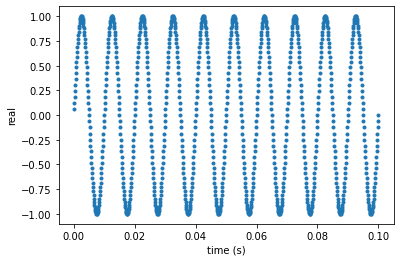

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel("time (s)")
ax.set_ylabel("real")

In [ ]:
ipd.Audio(s, rate = sr)

In [ ]:
#generate signal by complex-phasor
c = amp * np.exp(theta*1j)

Text(0.5, 0, ' imag')

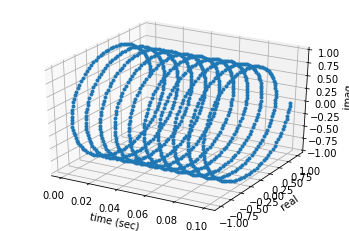

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection = '3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (sec)')
ax.set_ylabel(' real')
ax.set_zlabel(' imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np
x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data = [go.Scatter3d(x = x, y = y, z = z,
                                     mode = 'markers',
                                     marker = dict(size = 3))])
fig.update_layout(scene = dict(xaxis_title = 'time (sec)',
                               yaxis_title = 'real',
                               zaxis_title = 'imag'))
fig.show()

In [ ]:
ipd.Audio(c.imag, rate = sr)

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur + 1)/sr
  theta = t * 2*np.pi * freq
  s = amp * np.sin(theta)

  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate = sr)

In [ ]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur + 1) / sr
  theta = t * 2 * np.pi * freq
  c = amp * np.exp(theta * 1j)

  return c, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate = sr)

# **Generate pulse train<br>(=source)**


In [ ]:
#parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)

s_all = 0
for freq in range(F0, Fend + 1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

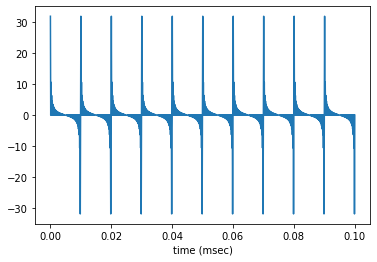

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000])
ax.set_xlabel("time (msec)")
ipd.Audio(s_all, rate = sr)

# Filter source

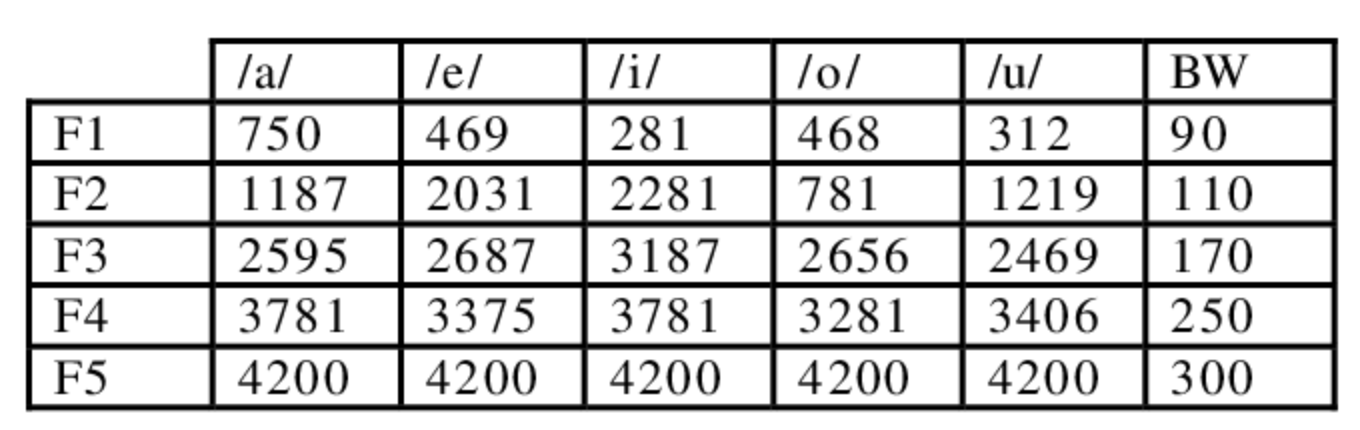

In [ ]:
def hz2w(F, sr):
  NyFreq = sr/2;
  w = F / NyFreq * np.pi;
  return w

def resonance(srate, F, BW):
  a2 = np.exp(-hz2w(BW, srate))
  omega = F * 2 * np.pi/srate
  a1 = -2 * np.sqrt(a2) * np.cos(omega)
  a = np.array([1, a1, a2])
  b = np.array([sum(a)])
  return a, b

In [ ]:
s = s_all

üëáüëá /e/ ÎßåÎì§Í∏∞ üëáüëá

In [ ]:
RG = 0    # RG is the frequency of the Glottal Resonator
BWG = 100 # BWG is the bandwidth of the Glottal Resonator
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
RG = 469  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
RG = 2031  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
RG = 2687  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
RG = 3375  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
RG = 4200  # RG is the frequency of the 5th Formant
BWG = 300  # BWG is the bandwidth of the 5th Formant
a, b = resonance(sr, RG, BWG)
s = lfilter(b, a, s, axis = 0)
ipd.Audio(s, rate = sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate = sr)

# load wav

In [ ]:
from google.colab import files
!rm *.wav
tmp = files.upload()
fn = list(tmp)[0]

Saving a.wav to a.wav


In [ ]:
from scipy.io import wavfile
sr, s = wavfile.read(fn)
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

In [ ]:
ipd.Audio(s, rate=sr)

Text(0, 0.5, 'amplitude')

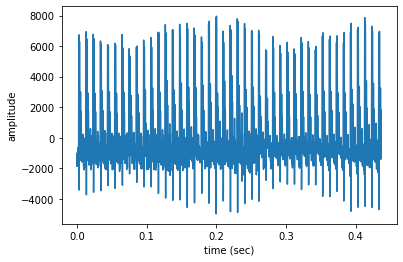

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s)
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')

# Fourier tranform

In [ ]:
nFFT = 512
freq = [];
amp = [];
for n in range(1,nFFT+1):
    freq.append(sr*n/nFFT) # "frequency"Í∞í Ï†ÄÏû•
    c, t, theta = phasor_complex(1, sr, dur, freq[-1])
    amp.append(np.abs(np.dot(s,c)))  #dot product ÌïòÍ∏∞(Í∏∏Ïù¥Í∞Ä ÎòëÍ∞ôÏïÑÏïº Ìï®)
          # dot productÏùò Í≤∞Í≥ºÍ∞íÏù∏ complexÍ∞íÏóê np.abs()Î•º Ï∑®Ìï¥ÏÑú Ï†àÎåìÍ∞í(ÏõêÏ†êÏúºÎ°úÎ∂ÄÌÑ∞Ïùò Í±∞Î¶¨)ÏùÑ Íµ¨Ìï®
          # Í∑∏Í≤å Î∞îÎ°ú "amplitude"Í∞í

Text(0, 0.5, 'amplitude')

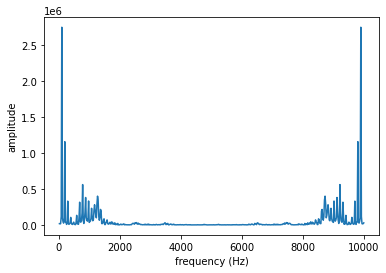

In [ ]:
fic = plt.figure()
ax = fic.add_subplot(111)
ax.plot(freq, amp)
ax.set_xlabel("frequency (Hz)")
ax.set_ylabel("amplitude")

# spectrum Í∑∏Î¶¨Í∏∞

Ïù∏Í∞ÑÏùò Í∞ÄÏ≤≠Ï£ºÌååÏàòÎäî 20000Ïù∏Îç∞, Í∑∏Í±∏ ÎîîÏßÄÌÑ∏ÌôîÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÎëêÎ∞∞Î•º Ìï¥Ïïº Ìï®. Í∑∏ÎûòÏÑú ÎîîÏßÄÌÑ∏ÏóêÏÑú 40000Ï†ïÎèÑÎ°ú Ïû°ÏïÑÏ£ºÎäî Í≤É.
<br><br>
- sampling rate(sr)Ïùò Ï†àÎ∞òÎßå ÏùòÎØ∏Í∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê... what?
<br><br>
  -> sampling rateÍ∞Ä 10000Ïù¥ÏóàÍ≥†, Ïûò Î≥¥Î©¥ ÏúÑÏùò Í∑∏ÎûòÌîÑÍ∞Ä Ï¢åÏö∞ÎåÄÏπ≠Ïù¥ÎùºÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå. Ï¶â, Ïò§Î•∏Ï™Ω Í≤É, Îã§Ïãú ÎßêÌï¥ Ï†àÎ∞òÏùÄ ÌïÑÏöî ÏóÜÎäî Í≤ÉÏûÑ.
srÍ∞Ä 10000Ïù¥Î©¥ 5000ÍπåÏßÄÎßå ÏùòÎØ∏Í∞Ä ÏûàÎã§Îäî Í≤É.
Í∑∏ÎãàÍπå Ïö∞Î¶¨Îäî 5000ÍπåÏßÄÎßå ÏûòÎùºÏÑú Ïì∞Î©¥ ÎêòÍ≤†Ï£†.
<br>
ÎÇòÏù¥Ïø†Ïä§ÏõÖÏïµ ÌîÑÎ¶¨ÌÄÄÏãúÏóê Ìï¥ÎãπÌïòÎäî Ï†àÎ∞òÎßå Ïú†ÏùòÎØ∏.


complex numberÎ•º complex Í≥µÍ∞ÑÏóêÏÑú Ï†úÍ≥±ÌïòÎ©¥ Í∞ÅÎèÑÎäî 2Î∞∞, Í∏∏Ïù¥Îäî Ï†úÍ≥±Ïù¥ ÎêúÎã§Îäî Í≤É... Ïù¥Îü∞ Í≤ÉÎèÑ ÏãúÌóòÎ¨∏Ï†ú ÎÇòÏò§Í∏∞ Ï¢ãÏ£†.

ÏöîÏ¶ò ÏÇ¨Ïã§ nlp ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ÎùºÍ≥† Ìï¥ÏÑú ÌÖçÏä§Ìä∏ Ï≤òÎ¶¨ÌïòÎäî Í≤å ÏãúÏû•ÏóêÏÑú Ìï´ÌïòÍ≤å ÌåîÎ¶¨Í≥† ÏûàÏñ¥Ïöî  Îã§Î£®Î©¥ Ï¢ãÏùÑÌÖêÎç∞ Î™ª Ìï¥ÏÑú ÏïÑÏâΩÍ≥†,, Î≠ê ÏùåÏÑ±Ïù¥ Îçî ÌïòÎìúÏΩîÏñ¥Í≥†..


# define helper function